## 2. Valores Atípicos

Existen criterios “automáticos” para elegir esos umbrales, como el criterio de las tres sigmas o del rango intercuartílico:

__Visualización:__ Boxplots.

__Criterio de las tres sigmas:__ elige los umbrales mínimo y máximo de la siguiente manera:

mínimo = valor medio - 3 x SD  
máximo = valor medio + 3 x SD

Es decir, el umbral mínimo es el valor tres sigmas por debajo del valor medio y el umbral máximo el valor tres sigmas por encima del valor medio.

__Criterio del rango intercuartílico:__ elige los umbrales mínimo y máximo de esta otra:

mínimo = Q1 - 1.5 x IQR  
máximo = Q3 + 1.5 x IQR

La mayoría de estos criterios tienen su mejor desempeño cuando la *distribución subyacente es normal.*Ya vimos que si la distribución subyacente es una ley de potencias, estos criterios están destinados a fracasar.

#### __Ejercicio:__  
Los datos que usaremos en esta sección, "DS_Bitácora_19_Data_VA1.csv" y "DS_Bitácora_19_Data_VA2.csv", fueron simulados con algún criterio desconocido. Uno de los archivos contiene "valores atípicos" y el otro no. El objetivo de esta sección es que decidan en cuál de ellos hay outliers y apliquen las técnicas vistas para detectarlos.

Empieza por uno de los archivos, y, una vez que hayas terminado, repite para el otro.


1. Exploración de datos.
    1. Abrir los datos y explorarlos. Para ello, recomendamos hacer un `distplot` y un `boxplot`. ¿Hay valores atípicos? Si los hay, ¿en qué región del dominio?
    2. Calcular algunos estadísticos sobre la muestra: valor medio, desviación estándar, cuartiles, máximo, mínimo, etc.
2. Manejo de Outliers
    1. Aplicar la técnica del rango interquartílico y la regla de las tres sigmas para seleccionar outliers. ¿Cuántos valores selecciona cada técnica?¿Seleccionan los mismos valores?
    2. Supongamos que seleccionamos outliers y los descartamos. ¿Qué pasa si volvemos a aplicar estas técnicas?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### CASO 1

__1. Exploración de Datos:__

In [2]:
data = pd.read_csv('Data\DS_Bitácora_19_Data_VA1.csv')

In [3]:
data

,Datos
0,2.370556
1,3.437876
2,6.300131
3,5.403170
4,5.722120
...,...
995,4.613314
996,4.188867
997,3.394737
998,6.384074


In [4]:
data.head()

,Datos
0,2.370556
1,3.437876
2,6.300131
3,5.403170
4,5.722120


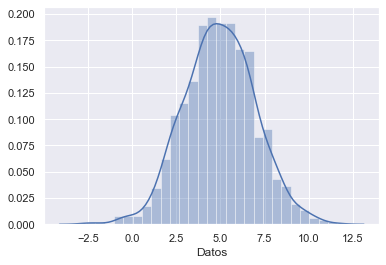

In [5]:
sns.distplot(data['Datos']) 

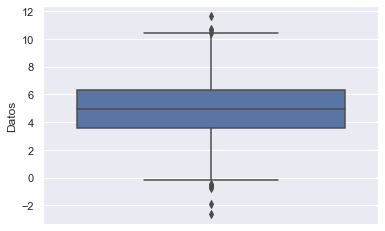

In [6]:
sns.boxplot(data = data, y = "Datos")

In [7]:
data.describe()

,Datos
count,1000.000000
mean,4.952783
std,2.008023
min,-2.619781
25%,3.607388
50%,4.960488
75%,6.332730
max,11.628151


__2. Manejo de Outliers:__

* __Rango Intercuartílico:__

In [8]:
# Q1 = data.quantile(0.25)  
# Q3 = data.quantile(0.75)  
# IQR = Q3 - Q1
# print (IQR) # Se visualiza el IQR para cada columna.
# data_2 = data [~ ((data <(Q1 - 1.5 * IQR)) | (data> (Q3 + 1.5 * IQR))). any (axis = 1)]

In [9]:
q25,q75 = data.quantile(0.25), data.quantile(0.75) # np.percentile(data.Datos.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5 * iqr
maximo = q75 + 1.5 * iqr
print(q25,q75,iqr, minimo, maximo)

Datos    3.607388
Name: 0.25, dtype: float64 Datos    6.33273
Name: 0.75, dtype: float64 Datos    2.725342
dtype: float64 Datos   -0.480625
dtype: float64 Datos    10.420743
dtype: float64


In [10]:
data_2 = data [~ ((data < minimo) | (data> maximo)). any (axis = 1)]
data_2

,Datos
0,2.370556
1,3.437876
2,6.300131
3,5.403170
4,5.722120
...,...
995,4.613314
996,4.188867
997,3.394737
998,6.384074


* *Eliminó 11 filas.*

* __3 Sigma:__

In [11]:
sigma = data.std()
mean = data.mean()
minimo = mean - 3 * sigma
maximo = mean + 3 * sigma
print(sigma, mean, minimo, maximo)

Datos    2.008023
dtype: float64 Datos    4.952783
dtype: float64 Datos   -1.071285
dtype: float64 Datos    10.976851
dtype: float64


In [12]:
data_3 = data [~ ((data < minimo) | (data> maximo)). any (axis = 1)]
data_3

,Datos
0,2.370556
1,3.437876
2,6.300131
3,5.403170
4,5.722120
...,...
995,4.613314
996,4.188867
997,3.394737
998,6.384074


* *Eliminó 3 filas.*

### CASO 2

__1. Exploración de Datos:__

In [13]:
data = pd.read_csv('Data\DS_Bitácora_19_Data_VA2.csv')
data

,Datos
0,2.370556
1,3.437876
2,6.300131
3,5.403170
4,5.722120
...,...
995,4.613314
996,4.188867
997,3.394737
998,6.384074


In [14]:
data.head()

,Datos
0,2.370556
1,3.437876
2,6.300131
3,5.403170
4,5.722120


In [15]:
data.describe()

,Datos
count,1000.000000
mean,5.059634
std,2.162233
min,-2.619781
25%,3.630454
50%,4.995364
75%,6.371097
max,13.613645


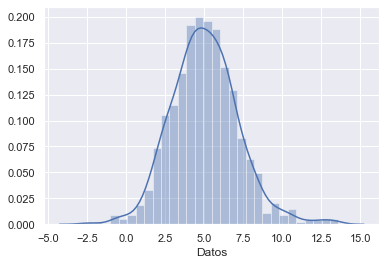

In [16]:
sns.distplot(data['Datos'])

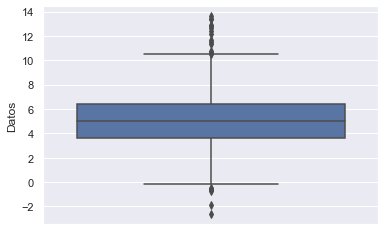

In [17]:
sns.boxplot(data = data, y = "Datos")

__2. Manejo de Outliers:__

* __Rango Intercuartilico:__

In [18]:
q25,q75 = data.Datos.quantile(0.25), data.Datos.quantile(0.75) # Pruebo con otra fórmula que da igual
iqr = q75 - q25
minimo = q25 - 1.5 * iqr
maximo = q75 + 1.5 * iqr
print(q25,q75,iqr, minimo, maximo)

3.6304538110419005 6.371096932721359 2.740643121679459 -0.4805108714772883 10.482061615240548


In [19]:
mascara_outliers = np.logical_or (data.Datos < minimo, data.Datos > maximo)
mascara_outliers.sum()

23

* *Eliminó 23 filas.*

* __3 Sigma:__

In [20]:
sigma = data.Datos.std() # Pruebo con otra fórmula que da igual
mean = data.Datos.mean()
minimo = mean - 3 * sigma
maximo = mean + 3 * sigma
print(sigma, mean, minimo, maximo)

2.1622328414523335 5.059634081667452 -1.4270644426895487 11.546332606024453


In [21]:
mascara_outliers = np.logical_or (data.Datos < minimo, data.Datos > maximo)
mascara_outliers.sum()

11

* *Eliminó 11 filas.*

* *Si seleccionamos outliers y los descartamos, y si volvemos a aplicar estas técnicas, ambas técnicas seleccionarían más datos, porque los mismos estarían cada vez más concentrados.*